In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fantasy_agn.models as FantasyModels

import agnfitlab.models as AGNFitLabModels

In [2]:
path_to_folder='testfit/'
FantasyModels.create_input_folder(xmin=4000, xmax=8000, path_to_folder=path_to_folder)
AGNFitLabModels.set_path(path_to_folder)

Directory  testfit/  Created 


In [3]:
# Create a model
m = AGNFitLabModels.create_line(name='line', pos=5200, ampl=5, fwhm=1000, offset=1000)
m

<GaussEmLine model instance 'line'>

In [4]:
m_lorentz = AGNFitLabModels.create_line(name='line', pos=5200, ampl=100, fwhm=1000, offset=1000, profile='lorentz')
m_lorentz

<LorentzEmLine model instance 'line'>

In [5]:
m_voigt = AGNFitLabModels.create_voigt_line(name='line', pos=5200, ampl=100, fwhm_g=1000, fwhm_l=1500, offset=1000)
m_voigt

<VoigtEmLine model instance 'line'>

In [6]:
fixed_ori = FantasyModels.create_fixed_model(['hydrogen.csv'], name='Test',
                                         fwhm=4650, min_fwhm=500, max_fwhm=8000,
                                         offset=-360., min_offset=-1000, max_offset=1000,
                                         amplitude=1, min_amplitude=0, max_amplitude=1000)
fixed_ori

<Fixed_Lines model instance 'Test'>

In [7]:
my_fixed = AGNFitLabModels.create_fixed_model(['hydrogen.csv'], name='Test',
                                         fwhm=4650, min_fwhm=500, max_fwhm=8000,
                                         offset=-360., min_offset=-1000, max_offset=1000,
                                         amplitude=10, min_amplitude=0, max_amplitude=1000,
                                         profile='lorentz')
my_fixed

<Fixed_Lines model instance 'Test'>

In [8]:
my_voigt = AGNFitLabModels.create_voigt_fixed_model(['hydrogen.csv'], name='Test',
                                         fwhm_g=200, min_fwhm_g=10, max_fwhm_g=8000,
                                         fwhm_l=6345, min_fwhm_l=500, max_fwhm_l=8000,
                                         offset=-360., min_offset=-1000, max_offset=1000,
                                         amplitude=10, min_amplitude=0, max_amplitude=1000)
my_voigt

<Fixed_Lines model instance 'Test'>

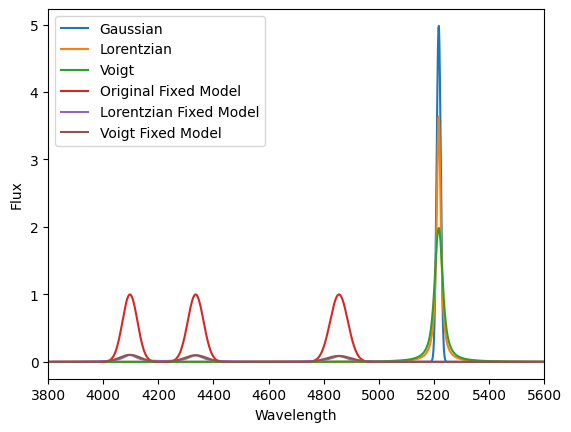

In [9]:
# Dummy data
wave = np.linspace(3800, 5600, 1000)

plt.figure()

plt.plot(wave, m(wave), label='Gaussian')
plt.plot(wave, m_lorentz(wave), label='Lorentzian')
plt.plot(wave, m_voigt(wave), label='Voigt')

plt.plot(wave, fixed_ori(wave), label='Original Fixed Model')
plt.plot(wave, my_fixed(wave), label='Lorentzian Fixed Model')
plt.plot(wave, my_voigt(wave), label='Voigt Fixed Model')

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.margins(x=0)
plt.legend()
plt.show()

In [10]:
import shutil
shutil.rmtree(path_to_folder)